### **MONTANDO O DRIVE**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os

path = '/content/drive/MyDrive/3_DOUTORADO/_UFC/Disciplinas/Inteligencia Computacional Aplicada/aerogerador.csv'

Mounted at /content/drive


### **CARREGANDO DADOS**

In [2]:
import numpy as np

def load_aeroGerador(file_path):
    data = np.loadtxt(file_path, delimiter=',', skiprows=1)

    x = data[:, 0].astype(float)    # Velocidade (m/s)
    y = data[:, 1].astype(float)   # Potencia (KW)

    return x, y


# Carregar os dados
x, y = load_aeroGerador(path)
n = len(y)

### **1º QUESTÃO**
>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Calcula os coeficientes dos mínimos quadrados (OLS)
def polyfit_ols(x, y, degree):
    X = np.vander(x, degree + 1)              # Cria a matriz de Vandermonde
    beta = np.linalg.inv(X.T @ X) @ X.T @ y   # Calcula os coeficientes
    return beta

# Previsões com o polinômio ajustado
def predict(beta, x):
    X = np.vander(x, len(beta))  # Matriz de Vandermonde
    return X @ beta

# Calcula o R²
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

# Calcula o R² ajustado
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Calcular o AIC
def aic_calc(n, mse, k):
    return n * np.log(mse) + 2 * k

In [4]:
# Listas para armazenar os resultados
r2_scores = []
r2_ajustado_scores = []
aic_valores = []

# Testa os polinômios de ordem 1 a 10
for degree in range(1, 11):
    beta = polyfit_ols(x, y, degree)          # Ajuste do polinômio
    y_pred = predict(beta, x)                 # Prever os valores
    r2 = r2_score(y, y_pred)                  # Calcula R² e R² ajustado
    k = degree + 1                            # Número de parâmetros (grau do polinômio + 1)
    r2_adjustado = adjusted_r2(r2, n, k)

    # Calcula o MSE e AIC
    mse = np.mean((y - y_pred) ** 2)
    aic = aic_calc(n, mse, k)

    # Armazena os resultados
    r2_scores.append(r2)
    r2_ajustado_scores.append(r2_adjustado)
    aic_valores.append(aic)

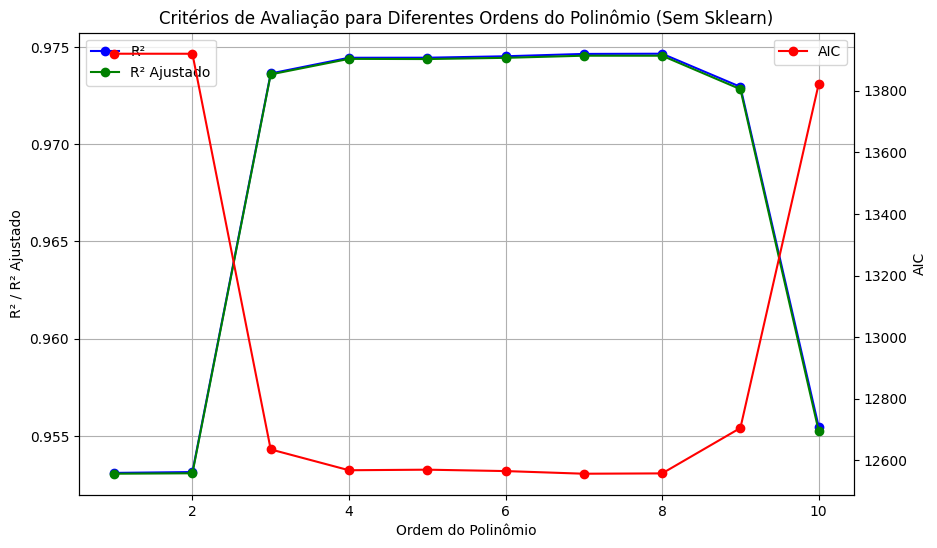

In [5]:
# Plota os resultados
fig, ax1 = plt.subplots(figsize=(10,6))

ax1.plot(range(1, 11), r2_scores, marker='o', label="R²", color="blue")
ax1.plot(range(1, 11), r2_ajustado_scores, marker='o', label="R² Ajustado", color="green")
ax1.set_xlabel("Ordem do Polinômio")
ax1.set_ylabel("R² / R² Ajustado")
ax1.legend(loc="upper left")
ax1.grid(True)

# Segundo eixo Y para o AIC
ax2 = ax1.twinx()
ax2.plot(range(1, 11), aic_valores, marker='o', label="AIC", color="red")
ax2.set_ylabel("AIC")
ax2.legend(loc="upper right")

plt.title("Critérios de Avaliação para Diferentes Ordens do Polinômio (Sem Sklearn)")
plt.show()

### **2º QUESTÃO**
>

Melhores coeficientes encontrados: [ 0.365 -4.774  5.507  7.753  9.953]
Erro quadrático (SEQ) mínimo encontrado: 1259839297.073
Coeficientes via OLS: [ -0.07285504   1.62475897  -7.52070647  24.2555527  -26.61007163]
Erro quadrático (SEQ) via OLS: 612027.9480095722


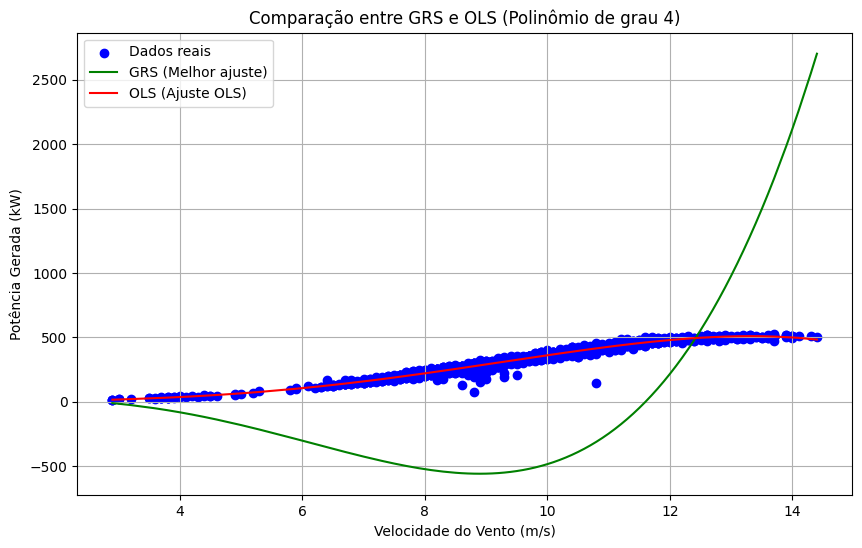

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Gera coeficientes aleatórios para o polinômio
def random_coefficients(degree):
    return np.random.uniform(-10, 10, degree + 1)

# Calcula o erro quadrático (SEQ)
def calc_erro(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2)

# Busca global aleatória (GRS)
def global_random_search(x, y, degree, iterations=1000):
    melhor_erro = np.inf       # Inicializar o melhor erro como infinito
    melhor_coeficiente = None  # Inicializar os melhores coeficientes como vazio

    for _ in range(iterations):
        coeffs = random_coefficients(degree)      # Coeficientes aleatórios
        y_pred = np.polyval(coeffs, x)            # previsões com os coeficientes gerados

        error = calc_erro(y, y_pred)        # Calcular o erro quadrático

        # Atualiza o erro, se necessário
        if error < melhor_erro:
            melhor_erro = error
            melhor_coeficiente = coeffs

    return np.round(melhor_coeficiente, 3), np.round(melhor_erro, 3)


degree = 4          # Grau do polinômio
iterations = 1000   # Número de iterações da busca aleatória

# Realiza a busca global aleatória (GRS)
melhor_coeficiente, melhor_erro = global_random_search(x, y, degree, iterations)

# Prever os valores usando os melhores coeficientes encontrados
y_pred_grs = np.polyval(melhor_coeficiente, x)

# Exibir os melhores coeficientes e o erro obtido
print("Melhores coeficientes encontrados:", melhor_coeficiente)
print("Erro quadrático (SEQ) mínimo encontrado:", melhor_erro)

# Comparar com os coeficientes via OLS
coeffs_ols = polyfit_ols(x, y, degree)
y_pred_ols = np.polyval(coeffs_ols, x)
error_ols = calc_erro(y, y_pred_ols)

print("Coeficientes via OLS:", coeffs_ols)
print("Erro quadrático (SEQ) via OLS:", error_ols)

# Plotar os resultados
plt.figure(figsize=(10,6))
plt.scatter(x, y, label="Dados reais", color="blue")
plt.plot(x, y_pred_grs, label="GRS (Melhor ajuste)", color="green")
plt.plot(x, y_pred_ols, label="OLS (Ajuste OLS)", color="red")
plt.xlabel("Velocidade do Vento (m/s)")
plt.ylabel("Potência Gerada (kW)")
plt.legend()
plt.title(f"Comparação entre GRS e OLS (Polinômio de grau {degree})")
plt.grid(True)
plt.show()


### **3º QUESTÃO**
>

Melhores coeficientes encontrados pelo GA: [  0.03810917  -1.01573768  10.33050854  -3.92162171 -24.99627334]
Erro quadrático (SEQ) mínimo encontrado pelo GA: 2167480.7030863916
Erro quadrático (SEQ) via OLS: 612027.9480095722


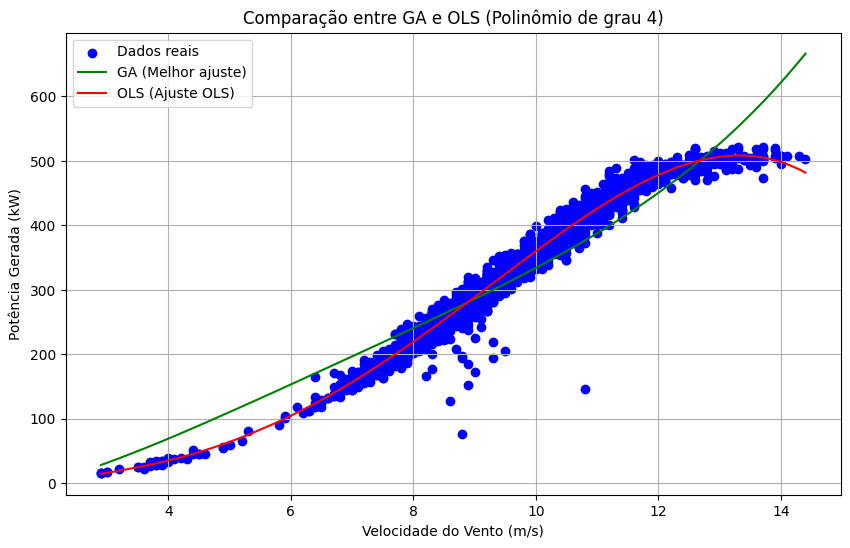

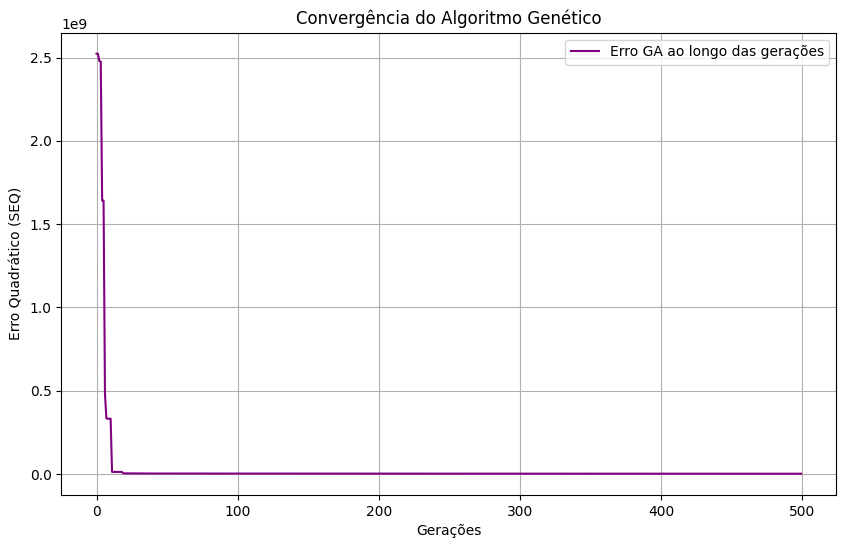

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Função para calcular o erro quadrático (SEQ)
def calculate_error(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2)

# Função para gerar um polinômio e calcular previsões
def predict(coeffs, x):
    return np.polyval(coeffs, x)

# Implementação do Algoritmo Genético (GA)
def genetic_algorithm(x, y, degree, population_size=100, generations=500, mutation_rate=0.01):
    # Inicializando a população de coeficientes aleatórios
    population = [np.random.uniform(-10, 10, degree + 1) for _ in range(population_size)]

    # Função de avaliação baseada no erro quadrático
    def fitness_function(coeffs):
        y_pred = predict(coeffs, x)
        return calculate_error(y, y_pred)

    # Função de mutação
    def mutate(coeffs):
        for i in range(len(coeffs)):
            if np.random.rand() < mutation_rate:
                coeffs[i] += np.random.uniform(-1, 1)
        return coeffs

    # Função de crossover
    def crossover(parent1, parent2):
        crossover_point = np.random.randint(0, len(parent1))
        child = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
        return child

    # Evolução ao longo das gerações
    best_error = np.inf
    best_coefficients = None
    errors = []

    for generation in range(generations):
        # Avaliando a população e selecionando os melhores
        population = sorted(population, key=fitness_function)
        errors.append(fitness_function(population[0]))

        # Guardando os melhores coeficientes
        if errors[-1] < best_error:
            best_error = errors[-1]
            best_coefficients = population[0]

        # Selecionando os melhores indivíduos para reprodução
        new_population = population[:population_size // 2]

        # Gerando a nova população via crossover e mutação
        while len(new_population) < population_size:
            idx1, idx2 = np.random.choice(len(new_population), 2, replace=False)
            parent1, parent2 = new_population[idx1], new_population[idx2]
            child = crossover(parent1, parent2)
            child = mutate(child)
            new_population.append(child)

        population = new_population

    return best_coefficients, best_error, errors

# Exemplo de uso
# Definir o grau do polinômio e os parâmetros do GA
degree = 4  # Grau do polinômio
population_size = 100  # Tamanho da população
generations = 500  # Número de gerações
mutation_rate = 0.01  # Taxa de mutação

# Executar o algoritmo genético
best_coefficients_ga, best_error_ga, errors_ga = genetic_algorithm(x, y, degree, population_size, generations, mutation_rate)

# Prever os valores usando os melhores coeficientes encontrados pelo GA
y_pred_ga = predict(best_coefficients_ga, x)

# Comparar com os coeficientes via OLS
coeffs_ols = polyfit_ols(x, y, degree)
y_pred_ols = np.polyval(coeffs_ols, x)
error_ols = calculate_error(y, y_pred_ols)

# Exibir os melhores coeficientes e erros
print("Melhores coeficientes encontrados pelo GA:", best_coefficients_ga)
print("Erro quadrático (SEQ) mínimo encontrado pelo GA:", best_error_ga)
print("Erro quadrático (SEQ) via OLS:", error_ols)

# Plotar os resultados
plt.figure(figsize=(10,6))
plt.scatter(x, y, label="Dados reais", color="blue")
plt.plot(x, y_pred_ga, label="GA (Melhor ajuste)", color="green")
plt.plot(x, y_pred_ols, label="OLS (Ajuste OLS)", color="red")
plt.xlabel("Velocidade do Vento (m/s)")
plt.ylabel("Potência Gerada (kW)")
plt.legend()
plt.title(f"Comparação entre GA e OLS (Polinômio de grau {degree})")
plt.grid(True)
plt.show()

# Plotar a curva de convergência do GA
plt.figure(figsize=(10,6))
plt.plot(errors_ga, label="Erro GA ao longo das gerações", color="purple")
plt.xlabel("Gerações")
plt.ylabel("Erro Quadrático (SEQ)")
plt.title("Convergência do Algoritmo Genético")
plt.grid(True)
plt.legend()
plt.show()


### **4º QUESTÃO**
>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# calcula o erro absoluto (SEA)
def calc_sea(y_true, y_pred):
    return np.sum(np.abs(y_true - y_pred))

# gera um polinômio e calcula previsões
def predict(coeffs, x):
    return np.polyval(coeffs, x)

# Implementação do Algoritmo Genético (GA) com SEA
def genetic_algorithm_sea(x, y, degree, population_size=100, generations=500, mutation_rate=0.01):
    populacao = [np.random.uniform(-10, 10, degree + 1) for _ in range(population_size)]

    # avaliação do erro absoluto (SEA)
    def fitness_function(coeffs):
        y_pred = predict(coeffs, x)
        return calc_sea(y, y_pred)

    # mutação
    def mutate(coeffs):
        for i in range(len(coeffs)):
            if np.random.rand() < mutation_rate:
                coeffs[i] += np.random.uniform(-1, 1)
        return coeffs

    # crossover
    def crossover(parent1, parent2):
        crossover_point = np.random.randint(0, len(parent1))
        child = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
        return child

    # Evolução ao longo das gerações
    melhor_erro = np.inf
    melhor_coeficiente = None
    erros = []

    for generation in range(generations):
        # Avaliando a população e selecionando os melhores
        populacao = sorted(populacao, key=fitness_function)
        erros.append(fitness_function(populacao[0]))

        # Guardando os melhores coeficientes
        if erros[-1] < melhor_erro:
            melhor_erro = erros[-1]
            melhor_coeficiente = populacao[0]

        # Selecionando os melhores indivíduos para reprodução
        nova_populacao = populacao[:population_size // 2]

        # Gerando a nova população via crossover e mutação
        while len(nova_populacao) < population_size:
            idx1, idx2 = np.random.choice(len(nova_populacao), 2, replace=False)
            parent1, parent2 = nova_populacao[idx1], nova_populacao[idx2]
            child = crossover(parent1, parent2)
            child = mutate(child)
            nova_populacao.append(child)

        populacao = nova_populacao

    return melhor_coeficiente, melhor_erro, erros

In [23]:
# Definir o grau do polinômio e os parâmetros do GA
degree = 4              # Grau do polinômio
population_size = 100   # Tamanho da população
generations = 500       # Número de gerações
tx_mutacao = 0.01       # Taxa de mutação

# Executar o algoritmo genético com SEA
melhor_coeficiente_ga_sea, melhor_erro_ga_sea, erros_ga_sea = genetic_algorithm_sea(x, y, degree, population_size, generations, mutation_rate)

# Prever os valores usando os melhores coeficientes encontrados pelo GA com SEA
y_pred_ga_sea = predict(melhor_coeficiente_ga_sea, x)

# Comparar com os coeficientes via OLS (SQE)
coef_ols = polyfit_ols(x, y, degree)
y_pred_ols = np.polyval(coef_ols, x)
erro_ols = calc_sea(y, y_pred_ols)

# Exibir os melhores coeficientes e erros
print("Melhores coeficientes encontrados pelo GA com SEA:", melhor_coeficiente_ga_sea)
print("Erro absoluto (SEA) mínimo encontrado pelo GA com SEA:", melhor_erro_ga_sea)
print("Erro absoluto (SEA) via OLS:", erro_ols)

# Calcular a norma dos coeficientes
norm_ga_sea = np.linalg.norm(melhor_coeficiente_ga_sea)
norm_ols = np.linalg.norm(coef_ols)

print("Norma dos coeficientes (GA com SEA):", norm_ga_sea)
print("Norma dos coeficientes (OLS):", norm_ols)

Melhores coeficientes encontrados pelo GA com SEA: [ 0.23154156 -3.55510845 13.03698902 27.65567006 26.89259105]
Erro absoluto (SEA) mínimo encontrado pelo GA com SEA: 231969.93753153813
Erro absoluto (SEA) via OLS: 24008.127189900777
Norma dos coeficientes (GA com SEA): 40.87423430597809
Norma dos coeficientes (OLS): 36.818934317705185


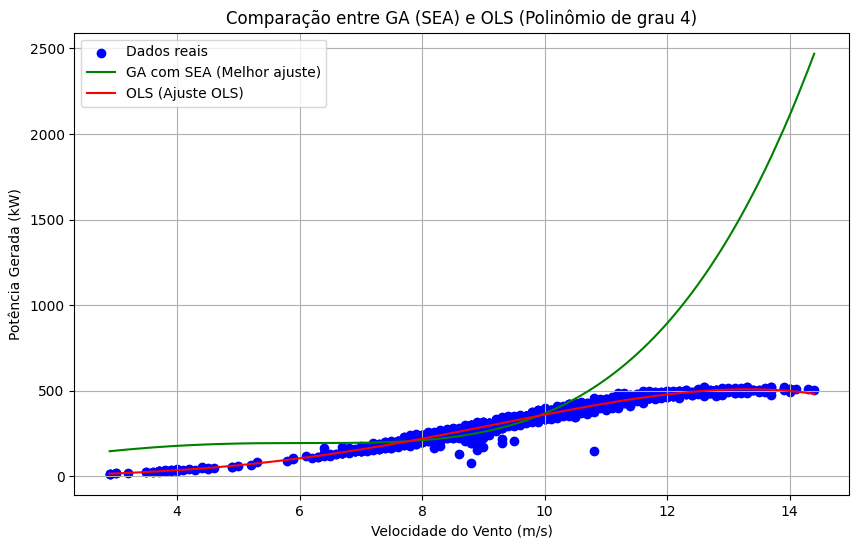

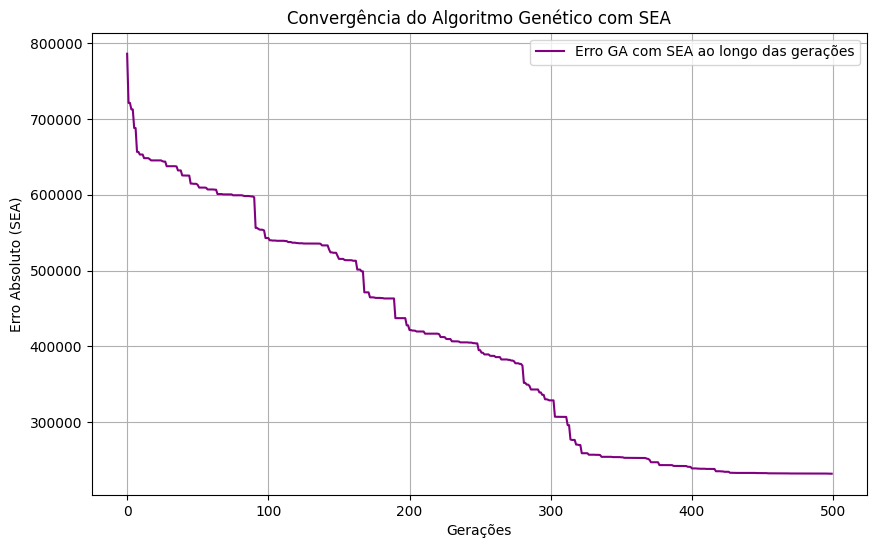

In [24]:
# Plotar os resultados
plt.figure(figsize=(10,6))
plt.scatter(x, y, label="Dados reais", color="blue")
plt.plot(x, y_pred_ga_sea, label="GA com SEA (Melhor ajuste)", color="green")
plt.plot(x, y_pred_ols, label="OLS (Ajuste OLS)", color="red")
plt.xlabel("Velocidade do Vento (m/s)")
plt.ylabel("Potência Gerada (kW)")
plt.legend()
plt.title(f"Comparação entre GA (SEA) e OLS (Polinômio de grau {degree})")
plt.grid(True)
plt.show()

# Plotar a curva de convergência do GA com SEA
plt.figure(figsize=(10,6))
plt.plot(erros_ga_sea, label="Erro GA com SEA ao longo das gerações", color="purple")
plt.xlabel("Gerações")
plt.ylabel("Erro Absoluto (SEA)")
plt.title("Convergência do Algoritmo Genético com SEA")
plt.grid(True)
plt.legend()
plt.show()
